In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn import under_sampling, over_sampling
import warnings
warnings.filterwarnings("ignore")

In [3]:
car = pd.read_csv('carclaims.csv')
car.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [5]:
le = LabelEncoder()

cols = car.select_dtypes('O').columns

car[cols]= car[cols].apply(le.fit_transform)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int32
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int32
 3   Make                  15420 non-null  int32
 4   AccidentArea          15420 non-null  int32
 5   DayOfWeekClaimed      15420 non-null  int32
 6   MonthClaimed          15420 non-null  int32
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int32
 9   MaritalStatus         15420 non-null  int32
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int32
 12  PolicyType            15420 non-null  int32
 13  VehicleCategory       15420 non-null  int32
 14  VehiclePrice          15420 non-null  int32
 15  PolicyNumber          15420 non-null  int64
 16  RepN

In [7]:
df= car[['DayOfWeek','Make','AccidentArea','Sex','Fault','PolicyType','VehiclePrice','Deductible','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','AgentType','AddressChange-Claim','Year','BasePolicy','FraudFound']]
df

,DayOfWeek,Make,AccidentArea,Sex,Fault,PolicyType,VehiclePrice,Deductible,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,AddressChange-Claim,Year,BasePolicy,FraudFound
0,6,6,1,0,0,5,5,300,3,1,3,0,0,0,1994,2,0
1,6,6,1,1,0,4,5,400,3,4,4,1,0,3,1994,1,0
2,0,6,1,1,0,4,5,400,0,5,6,0,0,3,1994,1,0
3,2,17,0,1,1,2,0,400,0,6,7,1,0,3,1994,2,0
4,1,6,1,0,1,4,5,400,3,3,4,0,0,3,1994,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,0,17,1,1,0,1,0,400,1,4,4,0,0,3,1996,1,1
15416,4,13,1,1,0,2,1,400,2,4,4,0,0,3,1996,2,0
15417,4,17,0,1,0,1,0,400,2,3,3,0,0,3,1996,1,1
15418,1,17,1,0,1,0,0,400,3,0,4,0,0,3,1996,0,0


## Feature selected RUS

In [8]:
X = df.drop('FraudFound',axis=1)
y = df['FraudFound']

In [9]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler (random_state=0)
X1,y1 = ros.fit_resample(X,y)
print(sorted(Counter(y1).items()),y1.shape)

[(0, 923), (1, 923)] (1846,)


In [10]:
print("Before RUS:")
print(y.value_counts())

print("\nAfter RUS:")
print(pd.Series(y1).value_counts())

Before RUS:
FraudFound
0    14497
1      923
Name: count, dtype: int64

After RUS:
FraudFound
0    923
1    923
Name: count, dtype: int64


In [11]:
X1.columns

Index(['DayOfWeek', 'Make', 'AccidentArea', 'Sex', 'Fault', 'PolicyType',
       'VehiclePrice', 'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType',
       'AddressChange-Claim', 'Year', 'BasePolicy'],
      dtype='object')

In [22]:
exp1 = setup(
    data=pd.concat([X1, pd.Series(y1, name='FraudFound')], axis=1),
    target='FraudFound')

,Description,Value
0,Session id,3670
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(1846, 17)"
4,Transformed data shape,"(1846, 17)"
5,Transformed train set shape,"(1292, 17)"
6,Transformed test set shape,"(554, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [23]:
best1_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7693,0.8292,0.9086,0.7135,0.7983,0.5385,0.5620,0.0240
ada,Ada Boost Classifier,0.7631,0.8067,0.8792,0.7172,0.7887,0.5261,0.5426,0.0200
catboost,CatBoost Classifier,0.7492,0.8284,0.8591,0.7072,0.7745,0.4983,0.5126,0.2590
rf,Random Forest Classifier,0.7423,0.8240,0.8096,0.7160,0.7585,0.4845,0.4911,0.0950
et,Extra Trees Classifier,0.7399,0.8125,0.7910,0.7203,0.7522,0.4798,0.4851,0.0800
lda,Linear Discriminant Analysis,0.7361,0.7972,0.8051,0.7117,0.7539,0.4721,0.4789,0.0080
lightgbm,Light Gradient Boosting Machine,0.7360,0.8231,0.7942,0.7140,0.7503,0.4721,0.4780,0.2220
ridge,Ridge Classifier,0.7353,0.0000,0.8066,0.7101,0.7537,0.4705,0.4775,0.0590
xgboost,Extreme Gradient Boosting,0.7291,0.8143,0.7772,0.7113,0.7420,0.4582,0.4611,0.0740
lr,Logistic Regression,0.7276,0.7943,0.7711,0.7128,0.7392,0.4552,0.4593,0.0260


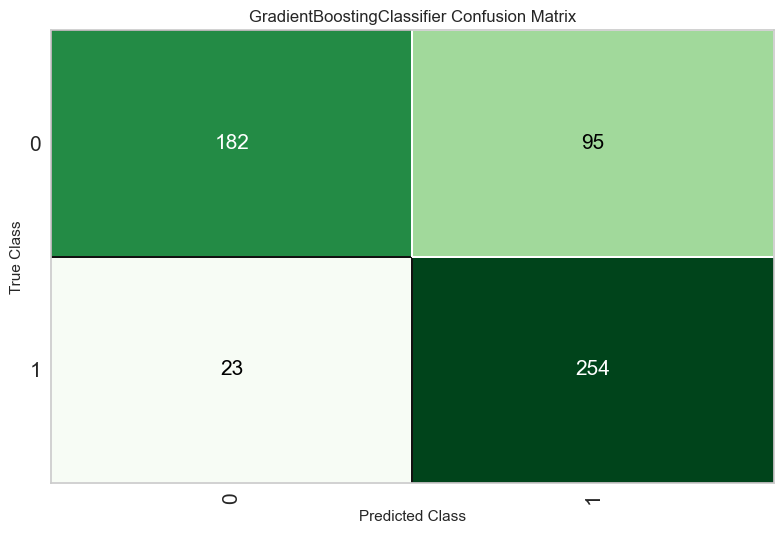

In [24]:
plot_model(best1_model, plot = 'confusion_matrix')

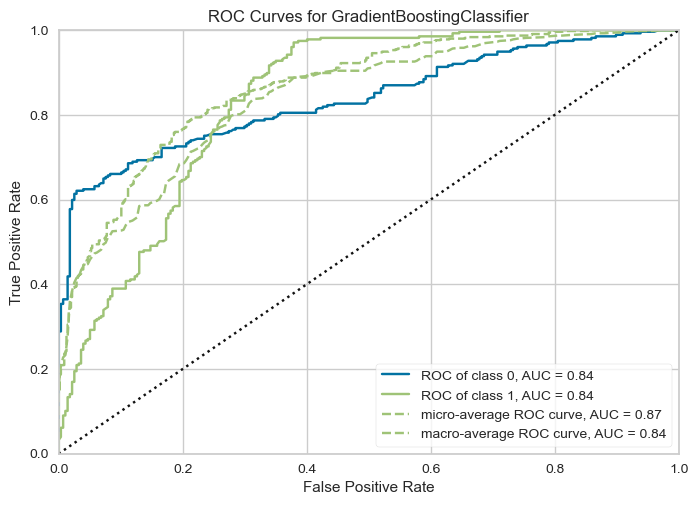

In [25]:
plot_model(best1_model, plot = 'auc')

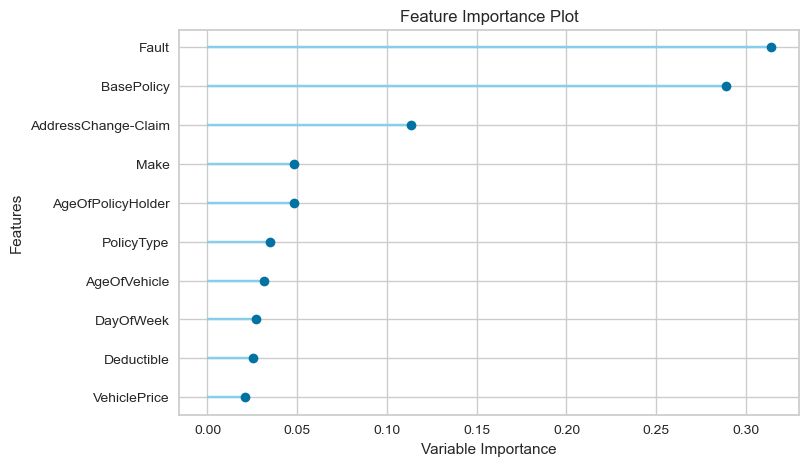

In [26]:
plot_model(best1_model, plot = 'feature')

In [27]:
holdout_pred = predict_model(best1_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7870,0.8377,0.9170,0.7278,0.8115,0.5740,0.5944


In [28]:
gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.8236,0.8615,0.7273,0.7887,0.5385,0.5479
1,0.8077,0.8520,0.9538,0.7381,0.8322,0.6154,0.6435
2,0.7209,0.7618,0.9231,0.6593,0.7692,0.4401,0.4812
3,0.7519,0.8173,0.8923,0.6988,0.7838,0.5028,0.5237
4,0.7674,0.8559,0.9385,0.7011,0.8026,0.5336,0.5679
5,0.7829,0.8451,0.9385,0.7176,0.8133,0.5648,0.5943
6,0.8372,0.8901,0.9219,0.7867,0.8489,0.6748,0.6848
7,0.8217,0.8611,0.8906,0.7808,0.8321,0.6438,0.6501
8,0.6977,0.7623,0.9062,0.6374,0.7484,0.3973,0.4371


In [29]:
tuned_dt = tune_model(best1_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7846,0.8137,0.9231,0.7229,0.8108,0.5692,0.5924
1,0.7923,0.8336,0.9385,0.7262,0.8188,0.5846,0.6113
2,0.7209,0.7748,0.9385,0.6559,0.7722,0.4399,0.4887
3,0.7519,0.8305,0.9231,0.6897,0.7895,0.5025,0.5348
4,0.7752,0.8502,0.9385,0.7093,0.8079,0.5492,0.5811
5,0.7829,0.8411,0.9692,0.7079,0.8182,0.5646,0.6086
6,0.8527,0.8995,0.9688,0.7848,0.8671,0.7059,0.7258
7,0.8140,0.8601,0.9062,0.7632,0.8286,0.6284,0.6396
8,0.6977,0.7897,0.9219,0.6344,0.7516,0.3974,0.4445


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [30]:
tuned_dt

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='log_loss', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.4, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=110, n_iter_no_change=None,
                           random_state=3670, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
boosted_dt = ensemble_model(best1_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7308,0.8232,0.7385,0.7273,0.7328,0.4615,0.4616
1,0.7846,0.8192,0.8154,0.7681,0.7910,0.5692,0.5703
2,0.6744,0.7202,0.7538,0.6533,0.7000,0.3480,0.3523
3,0.6977,0.8293,0.7538,0.6806,0.7153,0.3948,0.3972
4,0.7597,0.8457,0.8769,0.7125,0.7862,0.5185,0.5332
5,0.7597,0.8425,0.8308,0.7297,0.7770,0.5188,0.5240
6,0.7597,0.8522,0.7500,0.7619,0.7559,0.5193,0.5194
7,0.7442,0.8332,0.7188,0.7541,0.7360,0.4882,0.4887
8,0.7054,0.7361,0.7969,0.6711,0.7286,0.4117,0.4190


In [32]:
boosted_dt

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='log_loss',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_iter_no_change=None,
                                                        random_state=3670,
                                                        subsample=1.0,
                                                        tol=0.0001,
                                                        validation_fraction=0.1,
                                                        verbose=0,
                                                        warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=3670)

## raw data RUS

In [38]:
car

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,3,0,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,3,3,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,3,3,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,3,3,0,1994,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,0,0,0,3,3,0,1996,1,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,0,0,0,2,3,2,1996,2,0
15417,9,5,4,17,0,1,3,1,1,2,...,3,0,0,0,0,3,0,1996,1,1
15418,2,1,1,17,1,5,3,2,0,1,...,4,0,0,0,2,3,0,1996,0,0


In [34]:
X2 = car.drop('FraudFound', axis=1)
y2 = car['FraudFound']

In [35]:
rus = RandomUnderSampler (random_state=0)
Xr,yr = rus.fit_resample(X2,y2)
print(sorted(Counter(yr).items()),yr.shape)

[(0, 923), (1, 923)] (1846,)


In [36]:
exp1 = setup(
    data=pd.concat([Xr, pd.Series(yr, name='FraudFound')], axis=1),
    target='FraudFound')

,Description,Value
0,Session id,4912
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(1846, 33)"
4,Transformed data shape,"(1846, 33)"
5,Transformed train set shape,"(1292, 33)"
6,Transformed test set shape,"(554, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [37]:
best2_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8460,0.9120,0.9489,0.7882,0.8604,0.6919,0.7089,0.4790
xgboost,Extreme Gradient Boosting,0.8359,0.8999,0.9070,0.7943,0.8461,0.6718,0.6808,0.0760
lightgbm,Light Gradient Boosting Machine,0.8228,0.8923,0.8930,0.7835,0.8340,0.6455,0.6537,0.2330
gbc,Gradient Boosting Classifier,0.8042,0.8572,0.9256,0.7453,0.8252,0.6083,0.6287,0.0420
rf,Random Forest Classifier,0.7949,0.8428,0.9164,0.7373,0.8169,0.5898,0.6090,0.0570
et,Extra Trees Classifier,0.7740,0.8356,0.8902,0.7232,0.7975,0.5480,0.5646,0.0480
ridge,Ridge Classifier,0.7632,0.0000,0.9164,0.7017,0.7945,0.5264,0.5543,0.0090
lda,Linear Discriminant Analysis,0.7624,0.7812,0.9133,0.7019,0.7934,0.5248,0.5516,0.0100
ada,Ada Boost Classifier,0.7593,0.8015,0.8343,0.7253,0.7757,0.5186,0.5253,0.0260
nb,Naive Bayes,0.7446,0.7692,0.8622,0.6983,0.7713,0.4893,0.5041,0.0130


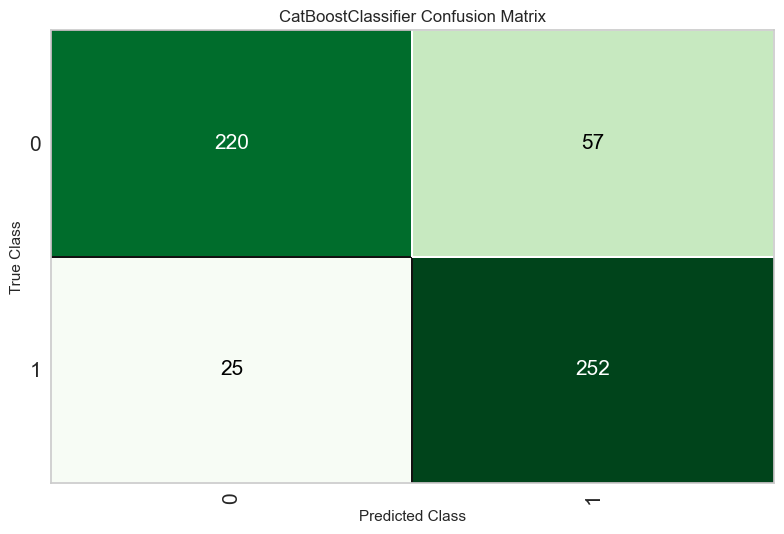

In [39]:
plot_model(best2_model, plot = 'confusion_matrix')

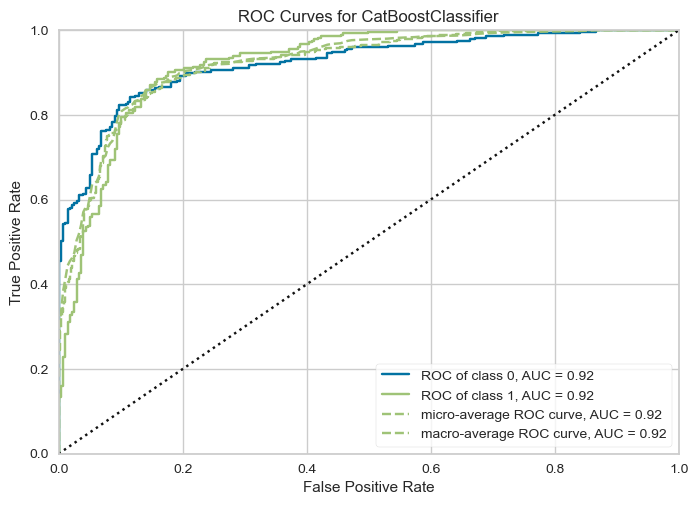

In [40]:
plot_model(best2_model, plot = 'auc')

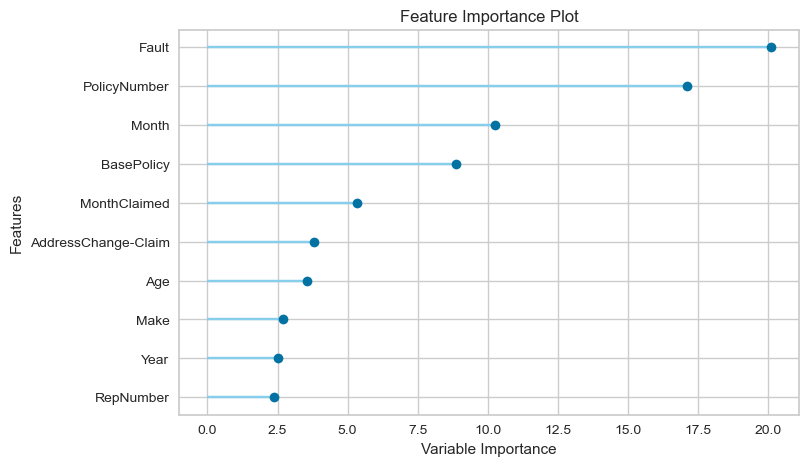

In [41]:
plot_model(best2_model, plot = 'feature')

In [42]:
holdout_pred = predict_model(best2_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8520,0.9221,0.9097,0.8155,0.8601,0.7040,0.7087


In [43]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8308,0.9262,0.9077,0.7867,0.8429,0.6615,0.6695
1,0.8385,0.9065,0.8769,0.8143,0.8444,0.6769,0.6789
2,0.8527,0.9156,0.9692,0.7875,0.8690,0.7049,0.7248
3,0.8295,0.8822,1.0000,0.7471,0.8553,0.6580,0.7002
4,0.8295,0.9094,0.9692,0.7590,0.8514,0.6582,0.6855
5,0.8605,0.9370,0.9538,0.8052,0.8732,0.7205,0.7334
6,0.8682,0.9132,0.9688,0.8052,0.8794,0.7368,0.7522
7,0.7907,0.8788,0.9062,0.7342,0.8112,0.5821,0.5985
8,0.8915,0.9474,1.0000,0.8205,0.9014,0.7833,0.8024


In [45]:
cat

In [46]:
tuned_dt1 = tune_model(best2_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8538,0.9188,0.9231,0.8108,0.8633,0.7077,0.7146
1,0.8077,0.8812,0.8462,0.7857,0.8148,0.6154,0.6172
2,0.8527,0.9240,0.9538,0.7949,0.8671,0.7049,0.7198
3,0.8372,0.8863,0.9538,0.7750,0.8552,0.6738,0.6929
4,0.8450,0.9159,0.9692,0.7778,0.8630,0.6893,0.7116
5,0.8760,0.9325,0.9846,0.8101,0.8889,0.7515,0.7699
6,0.8527,0.9014,0.9531,0.7922,0.8652,0.7059,0.7206
7,0.8062,0.8505,0.9062,0.7532,0.8227,0.6130,0.6258
8,0.8527,0.9421,0.9531,0.7922,0.8652,0.7059,0.7206


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
tuned_dt1

In [48]:
boosted_dt1 = ensemble_model(best2_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8385,0.9456,0.9077,0.7973,0.8489,0.6769,0.6835
1,0.8462,0.9115,0.8615,0.8358,0.8485,0.6923,0.6926
2,0.8605,0.9286,0.9692,0.7975,0.8750,0.7204,0.7381
3,0.8605,0.9101,1.0000,0.7831,0.8784,0.7203,0.7503
4,0.8450,0.9252,0.9538,0.7848,0.8611,0.6894,0.7063
5,0.8527,0.9438,0.9385,0.8026,0.8652,0.7050,0.7155
6,0.8682,0.9262,0.9688,0.8052,0.8794,0.7368,0.7522
7,0.7907,0.8740,0.8750,0.7467,0.8058,0.5819,0.5906
8,0.8992,0.9615,0.9844,0.8400,0.9065,0.7987,0.8105


In [49]:
boosted_dt1

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000019C88AE9B50>,
                   learning_rate=1.0, n_estimators=10, random_state=4912)